# Movie classification with the IMDB dataset

First we are going to install the necessary packages for this project. 

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
# install tensorflow and grab the dataset
import tensorflow as tf
from tensorflow.keras.datasets import imdb

## Grabbing and preparing the data


In [9]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [10]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [11]:
train_labels[0]

1

In [12]:
max([max(sequence) for sequence in train_data])

9999

In [14]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Preparing the data

We can't feed lists of integers into a neural network so firstly we have to convert them into tensors. 

In [0]:
import numpy as np


In [0]:
# create a function that turns our array into tensors
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [20]:
# let's have a look at one of the tensors now
x_train[0]

array([0., 1., 1., 0., ..., 0., 0., 0., 0.])

In [0]:
# Now going to vectorize the labels as well
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Now our data is ready to be fed into the neural network.

## Model

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [0]:
# let's split the training data into training and validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [29]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 57ms/step - loss: 0.5359 - acc: 0.7880 - val_loss: 0.4122 - val_acc: 0.8691
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3269 - acc: 0.8991 - val_loss: 0.3150 - val_acc: 0.8874
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2363 - acc: 0.9253 - val_loss: 0.2817 - val_acc: 0.8891
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1834 - acc: 0.9415 - val_loss: 0.2738 - val_acc: 0.8895
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1509 - acc: 0.9510 - val_loss: 0.2810 - val_acc: 0.8864
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1223 - acc: 0.9626 - val_loss: 0.2909 - val_acc: 0.8847
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0998 - acc: 0.9704 - val_loss: 0.3104 - val_acc: 0.8821
Epoch 8/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0822 - a

## Evaluation
Now we have trained our model - let's look at the data and see our results.

In [30]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

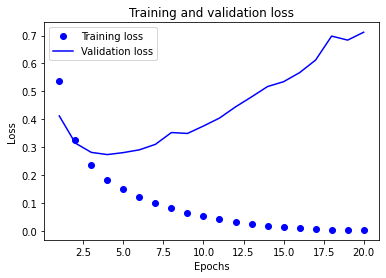

In [36]:
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


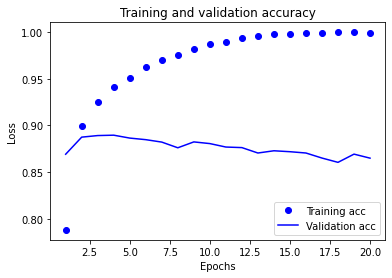

In [37]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, 21)

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title("Training and validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



We can see here that the model is overfitting as it is doing very well on the training data but not as good on the validation data. 

Let's train a new model from scratch for 4 epochs (where the val accuracy peaked) and then evaluate it on the test data.

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [40]:
model.fit(x_train,
          y_train,
          epochs=4,
          batch_size=512)

Epoch 1/4
49/49 [==============================] - 1s 26ms/step - loss: 0.4660 - accuracy: 0.8194
Epoch 2/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2583 - accuracy: 0.9100
Epoch 3/4
49/49 [==============================] - 2s 33ms/step - loss: 0.2004 - accuracy: 0.9286
Epoch 4/4
49/49 [==============================] - 1s 24ms/step - loss: 0.1692 - accuracy: 0.9395


In [41]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.3056 - accuracy: 0.8791


In [42]:
results

[0.30557867884635925, 0.8791199922561646]

A fairly naive approach but got a score of 88%. With more indepth approaches this score can be improved. 